# Atividade de Aprendizado de máquina: Busca por Parâmetros

Bianca Carneiro da Cunha Nunes Ferreira (bccnf)

# Passo 1: Preparando o ambiente

Importando todas as bibliotecas necessárias e o dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [2]:
df:pd.DataFrame = pd.read_excel("Dry_Bean_Dataset.xlsx")

# Passo 2: Pré-processamento dos Dados

Como podemos ver nas análises abaixo, as labels do dataset não estão bem distribuídas. Além disso, as colunas "Area" e "ConvexArea" tem valores e desvio padrão maiores que 1e^4, enquanto as outras features possuem valores até 1eˆ7 vezes menores, isso é um indicativo que nos beneficiaríamos em normalizar o dataset.

O dataset foi dividido em 60% treino e 40% teste. Antes da divisão ser feita, o dataset foi normalizado.

A normalização também foi feita no dataset de teste pois foi utilizado cross validation KFold nas técnicas de escolha de parâmetros utilizadas. Nesse método, o dataset de validação é sempre uma fração do dataset de treino, logo ele também seria normalizado. Por motivos de consistência com o dataset de validação, o dataset de teste também sofreu normalização.

Vale ressaltar que, em um problema real, isso não afetaria um modelo em produção, pois teríamos o normalizador utilizado no treinameto para modificar as features em produção.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


<Axes: >

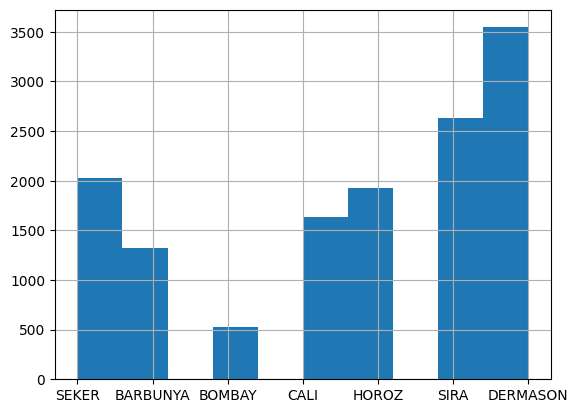

In [6]:
df.Class.hist()

## Dividindo o Dataset

In [7]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [8]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Passo 3: Definição dos Modelos

Aqui é definido os parâmetros que serão testados pelos modelos. Segue abaixo uma breve explicação dos parâmetros testados:

Árvore de decisão:
 - criterion: função para medir a quanlidade do split
 - min_samples_split: número mínimo de exemplos que folha tem que ter para ser dividida
 - max_leaf_nodes: número máximo de folhas
 - splitter: método de divisão

SVM:
 - C: Regularização
 - kernel: kernel usado no algorítmo
 - tol: tolerância

MLP
 - activation: função de ativação
 - solver: otmização dos pesos
 - hidden_layer_sizes: tamanho do hidden layer

## Árvore de decisão

In [10]:
decision_tree_params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "min_samples_split": [2, 0.3, 0.6, 0.9, 3],
    "max_leaf_nodes": [None, len(df.columns)],
    "splitter": ["best", "random"]
}

## SVM

In [11]:
svm_params = {
    "C": [0.5, 1.0, 1.5],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "tol": [1e-3, 1e-2, 1e-4]
}

## MLP

In [12]:
mlp_paramns = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'hidden_layer_sizes': [(1,),(5,),(10,),(15,),(20,),(21,)]
}

# Passo 4: Busca por Parâmetros

Nesse passo é testado os algorítmos RandomizedSearchCV e GridSearchCV para os três tipos de modelo.

Para ambos os algorítmos, em todos os casos, foi definido: 
 - *random_state=42*: para reproduzir o mesmo experimento caso precise reiniciar o kernel. **Apenas o RandomizedSearchCV precisou desse parâmetro** pois o GridSearchCV testa todos os possíveis resultados;
 - *n_jobs=-1*: para utilizarmos todos os processadores possíveis e otimizar a execução;
 - *cv=5*: para fazer um KFold com 5 folds, dividindo o dataset em 5 partes;
 - *scoring="accuracy"*: para escolher os melhores parâmetros a partir da acurácia;
 - *error_score='raise'*: para propagar possíveis erros no treinamento com dado conjunto de parâmentros e parar o teste

O experimento foi feito por modelo. Comparações de performance serão feitas nas próximas etapas.

## Decision Tree

In [13]:
decision_tree = DecisionTreeClassifier()

In [14]:
decision_tree_searcher = RandomizedSearchCV(decision_tree, decision_tree_params, random_state=42, n_jobs=-1, cv=5, error_score='raise', scoring="accuracy")

In [15]:
decision_tree_best = decision_tree_searcher.fit(X_train, y_train)

In [16]:
decision_tree_best.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'max_leaf_nodes': None,
 'criterion': 'log_loss'}

In [17]:
decision_tree_best.best_score_

0.8908879063321443

In [18]:
print(classification_report(y_test, decision_tree_best.predict(X_test)))

              precision    recall  f1-score   support

    BARBUNYA       0.86      0.88      0.87       538
      BOMBAY       1.00      1.00      1.00       203
        CALI       0.90      0.89      0.90       645
    DERMASON       0.90      0.89      0.89      1427
       HOROZ       0.92      0.94      0.93       759
       SEKER       0.92      0.93      0.93       809
        SIRA       0.84      0.83      0.83      1064

    accuracy                           0.89      5445
   macro avg       0.91      0.91      0.91      5445
weighted avg       0.89      0.89      0.89      5445



In [19]:
decision_tree_grid_searcher = GridSearchCV(decision_tree, decision_tree_params, n_jobs=-1, error_score='raise', scoring="accuracy", cv=5)

In [20]:
decision_tree_grid_best = decision_tree_grid_searcher.fit(X_train, y_train)

In [21]:
decision_tree_grid_best.best_params_

{'criterion': 'entropy',
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'splitter': 'best'}

In [22]:
decision_tree_grid_best.best_score_

0.8927244163185704

In [23]:
print(classification_report(y_test, decision_tree_grid_best.predict(X_test)))

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.89      0.88       538
      BOMBAY       1.00      1.00      1.00       203
        CALI       0.90      0.90      0.90       645
    DERMASON       0.90      0.88      0.89      1427
       HOROZ       0.93      0.93      0.93       759
       SEKER       0.93      0.92      0.93       809
        SIRA       0.83      0.84      0.83      1064

    accuracy                           0.89      5445
   macro avg       0.91      0.91      0.91      5445
weighted avg       0.89      0.89      0.89      5445



## SVM

In [24]:
svm = SVC()

In [25]:
svm_searcher = RandomizedSearchCV(svm, svm_params, random_state=42, n_jobs=-1, error_score='raise', cv = 5, scoring="accuracy")

In [26]:
svm_best = svm_searcher.fit(X_train, y_train)

In [27]:
svm_best.best_params_

{'tol': 0.01, 'kernel': 'rbf', 'C': 1.0}

In [28]:
svm_best.best_score_

0.924320528032224

In [29]:
print(classification_report(y_test, svm_best.predict(X_test)))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.94       538
      BOMBAY       1.00      1.00      1.00       203
        CALI       0.94      0.95      0.94       645
    DERMASON       0.93      0.92      0.93      1427
       HOROZ       0.97      0.96      0.97       759
       SEKER       0.96      0.95      0.95       809
        SIRA       0.87      0.91      0.89      1064

    accuracy                           0.93      5445
   macro avg       0.95      0.94      0.95      5445
weighted avg       0.93      0.93      0.93      5445



In [30]:
svm_grid_searcher = GridSearchCV(svm, svm_params, n_jobs=-1, error_score='raise', cv=5, scoring="accuracy")

In [31]:
svm_grid_best = svm_grid_searcher.fit(X_train, y_train)

In [32]:
svm_grid_best.best_params_

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}

In [33]:
svm_grid_best.best_score_

0.9255448930076655

In [34]:
print(classification_report(y_test, svm_grid_best.predict(X_test)))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.93       538
      BOMBAY       1.00      1.00      1.00       203
        CALI       0.94      0.95      0.94       645
    DERMASON       0.93      0.93      0.93      1427
       HOROZ       0.98      0.96      0.97       759
       SEKER       0.96      0.95      0.95       809
        SIRA       0.88      0.91      0.89      1064

    accuracy                           0.94      5445
   macro avg       0.95      0.94      0.95      5445
weighted avg       0.94      0.94      0.94      5445



## MLP

In [35]:
mlp = MLPClassifier()

In [36]:
mlp_searcher = RandomizedSearchCV(mlp, mlp_paramns, random_state=42, n_jobs=-1, cv=5, scoring="accuracy")

In [ ]:
mlp_best = mlp_searcher.fit(X_train, y_train)

In [38]:
mlp_best.best_params_

{'solver': 'adam', 'hidden_layer_sizes': (20,), 'activation': 'tanh'}

In [39]:
mlp_best.best_score_

0.9262798867602935

In [40]:
print(classification_report(y_test, mlp_best.predict(X_test)))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.95      0.94       538
      BOMBAY       1.00      1.00      1.00       203
        CALI       0.95      0.93      0.94       645
    DERMASON       0.92      0.93      0.93      1427
       HOROZ       0.97      0.95      0.96       759
       SEKER       0.96      0.94      0.95       809
        SIRA       0.89      0.90      0.89      1064

    accuracy                           0.93      5445
   macro avg       0.94      0.94      0.94      5445
weighted avg       0.93      0.93      0.93      5445



In [41]:
mlp_grid_searcher = GridSearchCV(mlp, mlp_paramns, n_jobs=-1, cv=5, scoring="accuracy")

In [ ]:
mlp_grid_best = mlp_grid_searcher.fit(X_train, y_train)

In [43]:
mlp_grid_best.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (15,), 'solver': 'adam'}

In [44]:
mlp_grid_best.best_score_

0.9276270255239061

In [45]:
print(classification_report(y_test, mlp_grid_best.predict(X_test)))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.93      0.93       538
      BOMBAY       1.00      1.00      1.00       203
        CALI       0.94      0.94      0.94       645
    DERMASON       0.93      0.92      0.93      1427
       HOROZ       0.97      0.95      0.96       759
       SEKER       0.96      0.94      0.95       809
        SIRA       0.87      0.91      0.89      1064

    accuracy                           0.93      5445
   macro avg       0.94      0.94      0.94      5445
weighted avg       0.93      0.93      0.93      5445



# Passo 5: Avaliação dos modelos

Primeiramente duas funções foram desenvolvidas para auxiliar na visualização das diferenças de performance entre os modelos e as técnicas. Descrições sobre elas estão anotadas nas mesmas.

Como vimos nas análises acima, as classes do dataset não são igualmente distribuídas, logo será utilizado a versão "weighted" da precisão, do recall e do f1 score, para considerar o não balanceamento dos dados.

Todos os experimentos foram realizados sobre o dataset de teste.

Como pode ser visto com mais detalhes nas análises abaixo, o SVM com o Grid Search é o melhor modelo treinado. No entanto, se comparado com a MLP, a melhora é de menos de 0.1% e pode ser estatisticamente irrelevante. Um teste estatístico seria necessário para comprovar que o SVM realmente é melhor. 

Adicionalmente, para a Decision Tree e o SVM, o Grid Search obteve melhor performance, enquanto para a MLP o Randomized Search obteve melhor resultado. No entando, novamente, as difereças são de aproximadamente 0.1% e um teste estatístico precisaria ser realizado para comprovar que esses modelos realmente são superiories.

In [46]:
def create_scatter_plot(X:list[str], y:list[list], title_metric:str="") -> None:
    """
    Cria plot de pontos com duas séries de dados.
    """
    _, ax = plt.subplots()
    ax.scatter(X, y[0], marker='o')
    ax.scatter(X, y[1], marker='^')
    ax.legend(["Randomized Search", "Grid Search"])
    ax.grid(True)
    ax.set_title(f"Comparação da métrica {title_metric}")
    plt.show()

In [47]:
def print_metrics(metric_vet:list, metric_name:str):
    """
    Printa comparativo das metricas
    """
    met1 = "Randomized Search"
    met2 = "Grid Search"
    spaces = " "*20
    methods = ["Decision tree", "SVM", "MLP"]
    print(f"{metric_name:-^60}")
    print(f"{spaces}{met1: ^18} | {met2: ^18}")
    for idx, it in enumerate(methods):
        print(f"{it: ^19} {metric_vet[0][idx]: ^18} | {metric_vet[1][idx]: ^18}")

## Acurácia

O melhor modelo foi o SVM com o Grid Search, com acurácia igual a 0.9351698806244261

In [48]:
x_axis = ["Decision tree", "SVM", "MLP"]
y_axis = [
    [
        accuracy_score(y_test, decision_tree_best.predict(X_test)),
        accuracy_score(y_test, svm_best.predict(X_test)),
        accuracy_score(y_test, mlp_best.predict(X_test))
    ], [
        accuracy_score(y_test, decision_tree_grid_best.predict(X_test)),
        accuracy_score(y_test, svm_grid_best.predict(X_test)),
        accuracy_score(y_test, mlp_grid_best.predict(X_test))
    ]
]

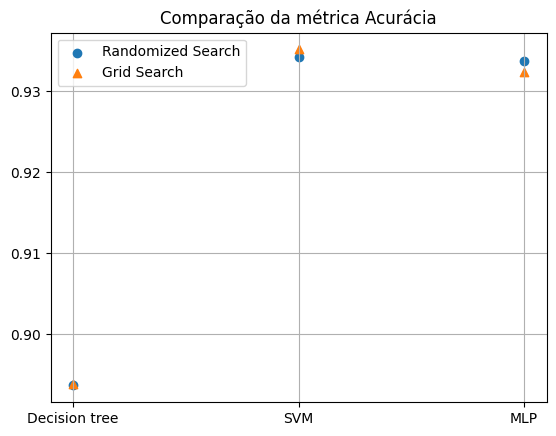

In [49]:
create_scatter_plot(x_axis, y_axis, "Acurácia")

In [50]:
print_metrics(y_axis, " Acurácia ")

------------------------- Acurácia -------------------------
                    Randomized Search  |    Grid Search    
   Decision tree     0.89366391184573  | 0.8938475665748393
        SVM         0.9342516069788797 | 0.9351698806244261
        MLP         0.9337006427915518 | 0.9324150596877869


## Precisão 

O melhor modelo foi o SVM com o Grid Search, com precisão igual a 0.9358424723094114

In [51]:
x_axis = ["Decision tree", "SVM", "MLP"]
y_axis = [
    [
        precision_score(y_test, decision_tree_best.predict(X_test), average="weighted"),
        precision_score(y_test, svm_best.predict(X_test), average="weighted"),
        precision_score(y_test, mlp_best.predict(X_test), average="weighted")
    ], [
        precision_score(y_test, decision_tree_grid_best.predict(X_test), average="weighted"),
        precision_score(y_test, svm_grid_best.predict(X_test), average="weighted"),
        precision_score(y_test, mlp_grid_best.predict(X_test), average="weighted")
    ]
]

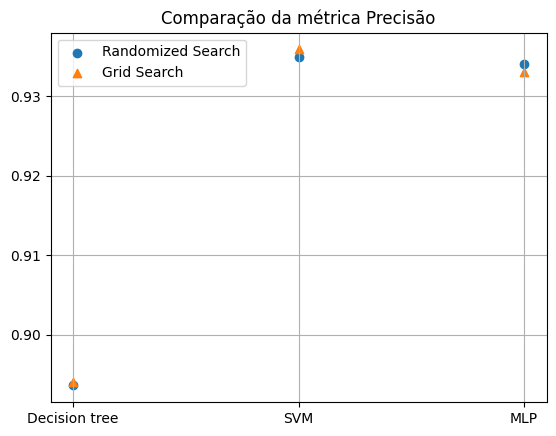

In [52]:
create_scatter_plot(x_axis, y_axis, "Precisão")

In [53]:
print_metrics(y_axis, " Precisão ")

------------------------- Precisão -------------------------
                    Randomized Search  |    Grid Search    
   Decision tree    0.8936252553910038 | 0.8941232535415499
        SVM         0.9349597685311677 | 0.9358424723094114
        MLP         0.9339684984730845 | 0.9330683625507367


## Recall

O melhor modelo foi o SVM com o Grid Search, com recall igual a 0.9351698806244261

In [54]:
x_axis = ["Decision tree", "SVM", "MLP"]
y_axis = [
    [
        recall_score(y_test, decision_tree_best.predict(X_test), average="weighted"),
        recall_score(y_test, svm_best.predict(X_test), average="weighted"),
        recall_score(y_test, mlp_best.predict(X_test), average="weighted")
    ], [
        recall_score(y_test, decision_tree_grid_best.predict(X_test), average="weighted"),
        recall_score(y_test, svm_grid_best.predict(X_test), average="weighted"),
        recall_score(y_test, mlp_grid_best.predict(X_test), average="weighted")
    ]
]

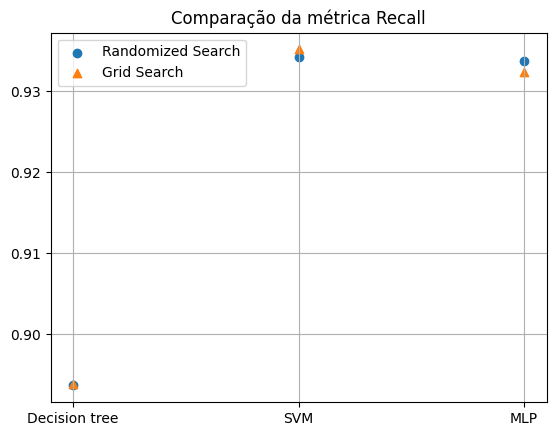

In [55]:
create_scatter_plot(x_axis, y_axis, "Recall")

In [56]:
print_metrics(y_axis, " Recall ")

-------------------------- Recall --------------------------
                    Randomized Search  |    Grid Search    
   Decision tree     0.89366391184573  | 0.8938475665748393
        SVM         0.9342516069788797 | 0.9351698806244261
        MLP         0.9337006427915518 | 0.9324150596877869


## F1_score

O melhor modelo foi o SVM com o Grid Search, com f1_score igual a 0.9353849552217646

In [57]:
x_axis = ["Decision tree", "SVM", "MLP"]
y_axis = [
    [
        f1_score(y_test, decision_tree_best.predict(X_test), average="weighted"),
        f1_score(y_test, svm_best.predict(X_test), average="weighted"),
        f1_score(y_test, mlp_best.predict(X_test), average="weighted")
    ], [
        f1_score(y_test, decision_tree_grid_best.predict(X_test), average="weighted"),
        f1_score(y_test, svm_grid_best.predict(X_test), average="weighted"),
        f1_score(y_test, mlp_grid_best.predict(X_test), average="weighted")
    ]
]

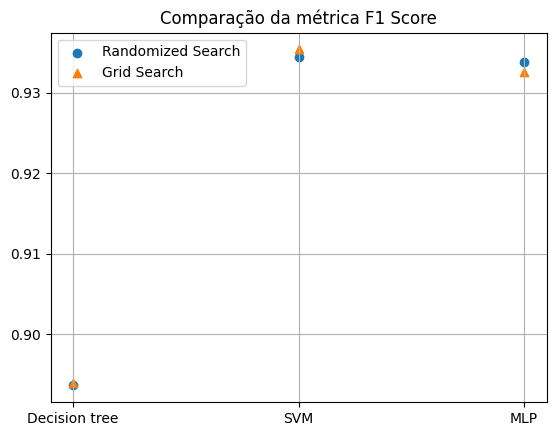

In [58]:
create_scatter_plot(x_axis, y_axis, "F1 Score")

In [59]:
print_metrics(y_axis, " F1 Score ")

------------------------- F1 Score -------------------------
                    Randomized Search  |    Grid Search    
   Decision tree    0.8936116823541168 | 0.8939556324674537
        SVM         0.9344786324177001 | 0.9353849552217646
        MLP         0.9338000959566745 | 0.9326388203028655
